### Notebook to identify and visualise gene markers for MultiC cell states

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v230626

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 130, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.7.0
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.4
numexpr             2.8.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.0.0
prompt_toolkit      3.0.

### Read in Healthy-CTRL dataset

In [3]:
BrEpit_ALL = sc.read_h5ad('../data/Epithelial_MultiC_ctl230612_states.raw.h5ad') 
BrEpit_ALL

AnnData object with n_obs × n_vars = 4645 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', '_scvi_batch', '_scvi_labels', 'IAV_score', 'group', 'C_scANVI', 'cell_type', 'leiden', 'leiden_states', 'seed_labels', 'Viral_score', 'C_scANVI_v2', 'mixed_states', 'fine_states'
    var: 'mt', 'ribo', 'n_cells_by_counts-V1', 'mean_counts-V1', 'pct_dropout_by_counts-V1', 'total_counts-V1', 'n_cells_by_counts-V2', 'mean_counts-V2', 'pct_dropout_by_counts-V2', 'total_counts-V2', 'n_cells_by_counts-V3', 'mean_counts-V3', 'pct_dropout_by_counts-V3', 'total_counts-V3', 'n_cells_by_counts-V4', 'mean_counts-V4', 'pct_dropout_by_counts-V4', 'total

In [5]:
BrEpit_ALL.obs['fine_states'].cat.categories

Index(['MultiC_OMG+', 'immuneBrush-Club', 'AT2_IL32+', 'Brush-Club_TCN1+',
       'Ciliated_FOXN4+', 'iavEpi_OAS'],
      dtype='object')

### Normalise and transform data

In [6]:
adata_log = anndata.AnnData(X = BrEpit_ALL.X,  var = BrEpit_ALL.var, obs = BrEpit_ALL.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)
adata_log.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata_log, inplace = False)["X"]
)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['BPIFA1', 'MALAT1', 'MT-ATP6', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MTRNR2L12', 'MTRNR2L8', 'NC_026431.1', 'NC_026432.1', 'NC_026433.1', 'NC_026434.1', 'NC_026435.1', 'NC_026436.1', 'NC_026437.1', 'NC_026438.1', 'SAA1', 'SCGB1A1', 'SLPI']
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


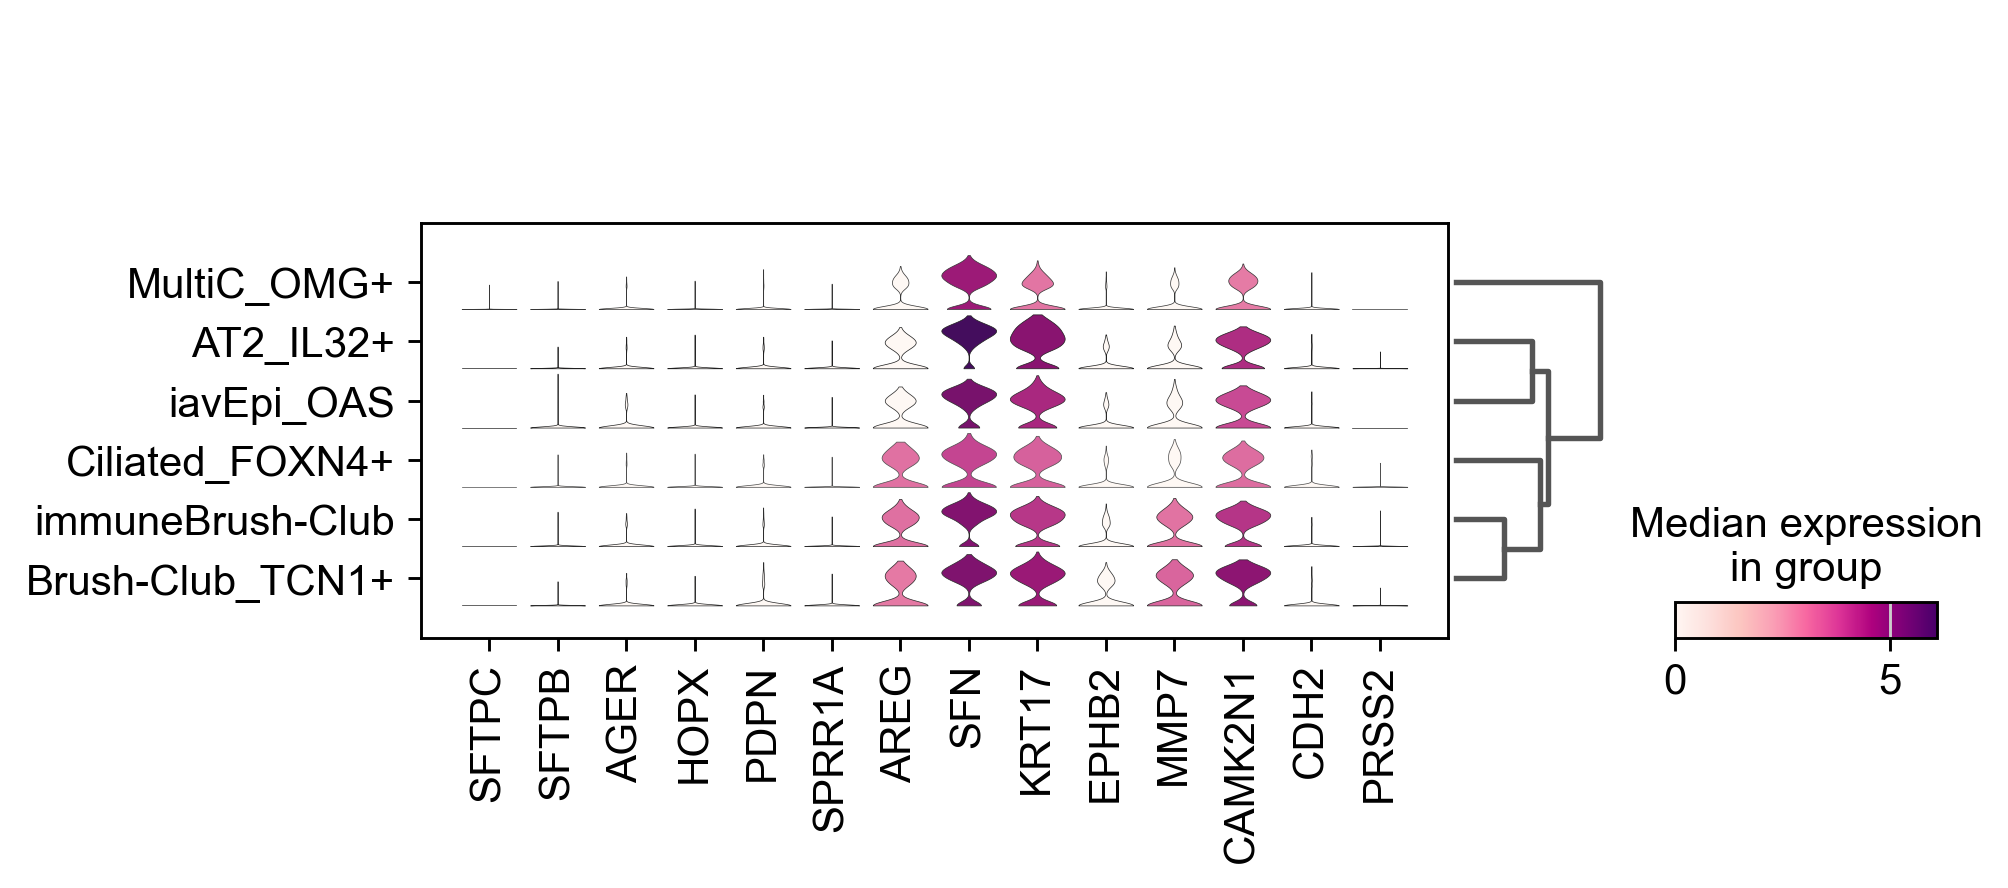

In [17]:
markers = ['SFTPC', 'SFTPB', 'AGER', 'HOPX', 'PDPN', 'SPRR1A', 'AREG', 'SFN', 'KRT17', 'EPHB2', 'MMP7', 'CAMK2N1', 'CDH2', 'PRSS2']
sc.pl.stacked_violin(adata_log, markers, groupby = 'fine_states', dendrogram = True, cmap = 'RdPu')

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


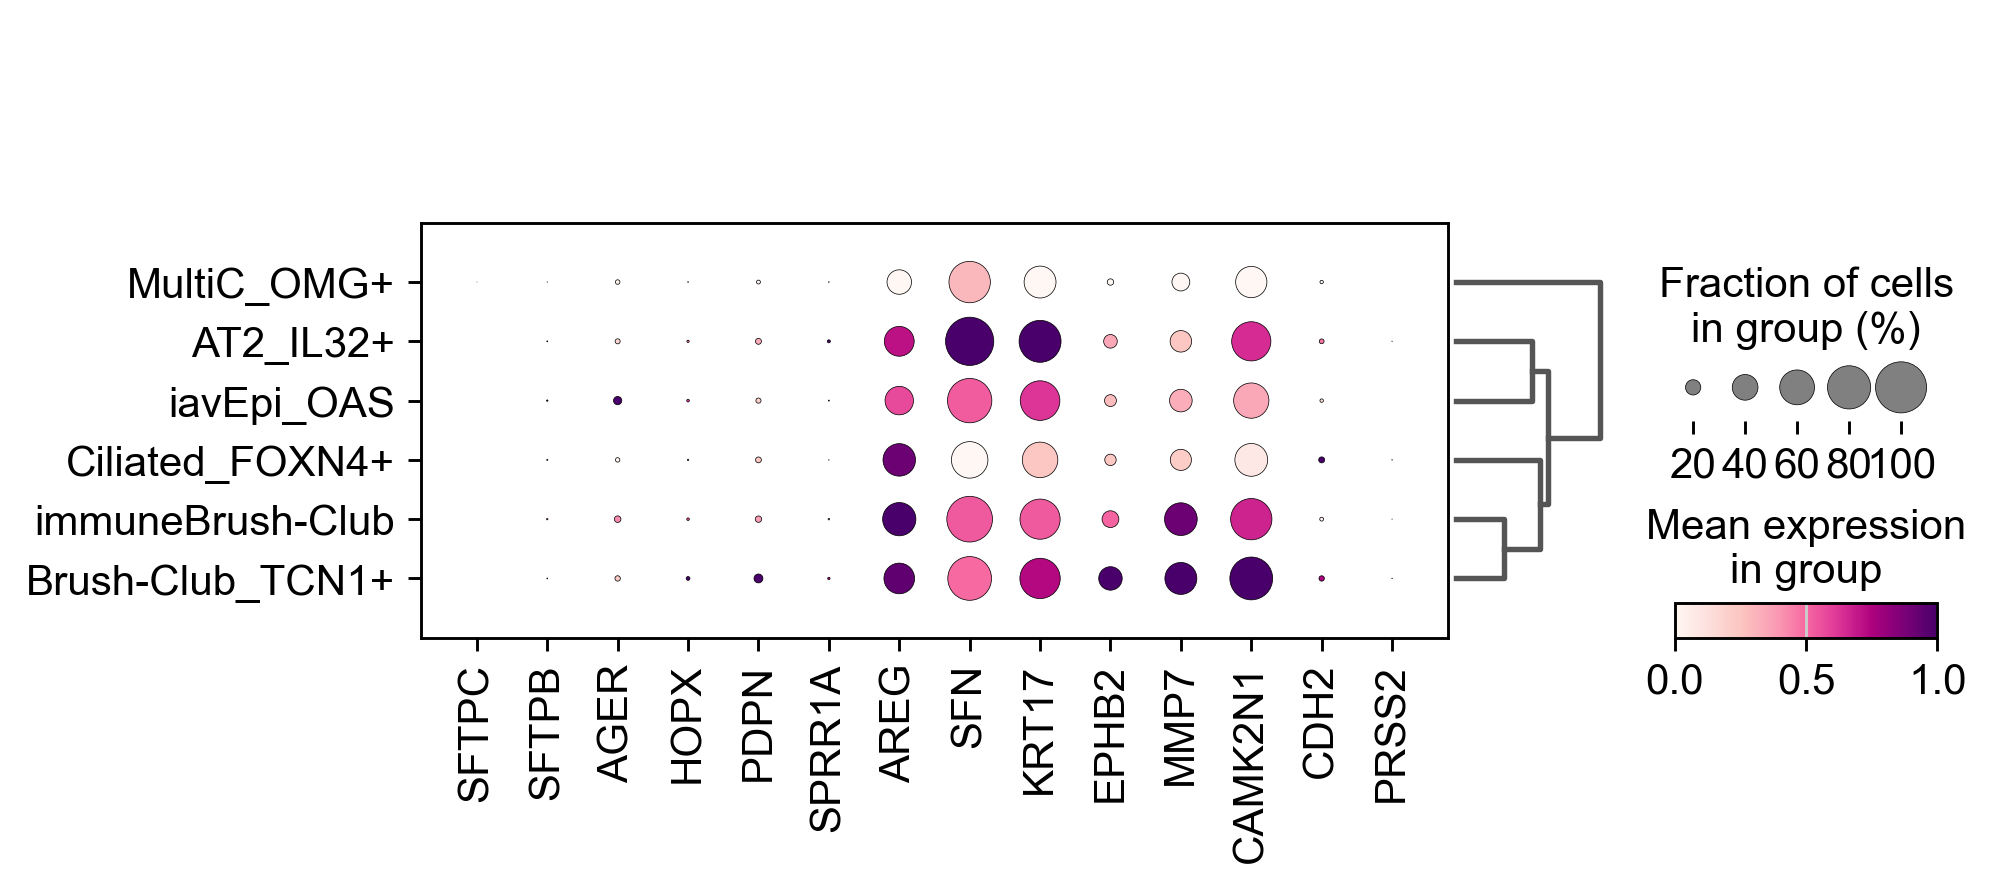

In [18]:
sc.pl.dotplot(adata_log, markers, groupby='fine_states', dendrogram = True, standard_scale='var', cmap = 'RdPu')

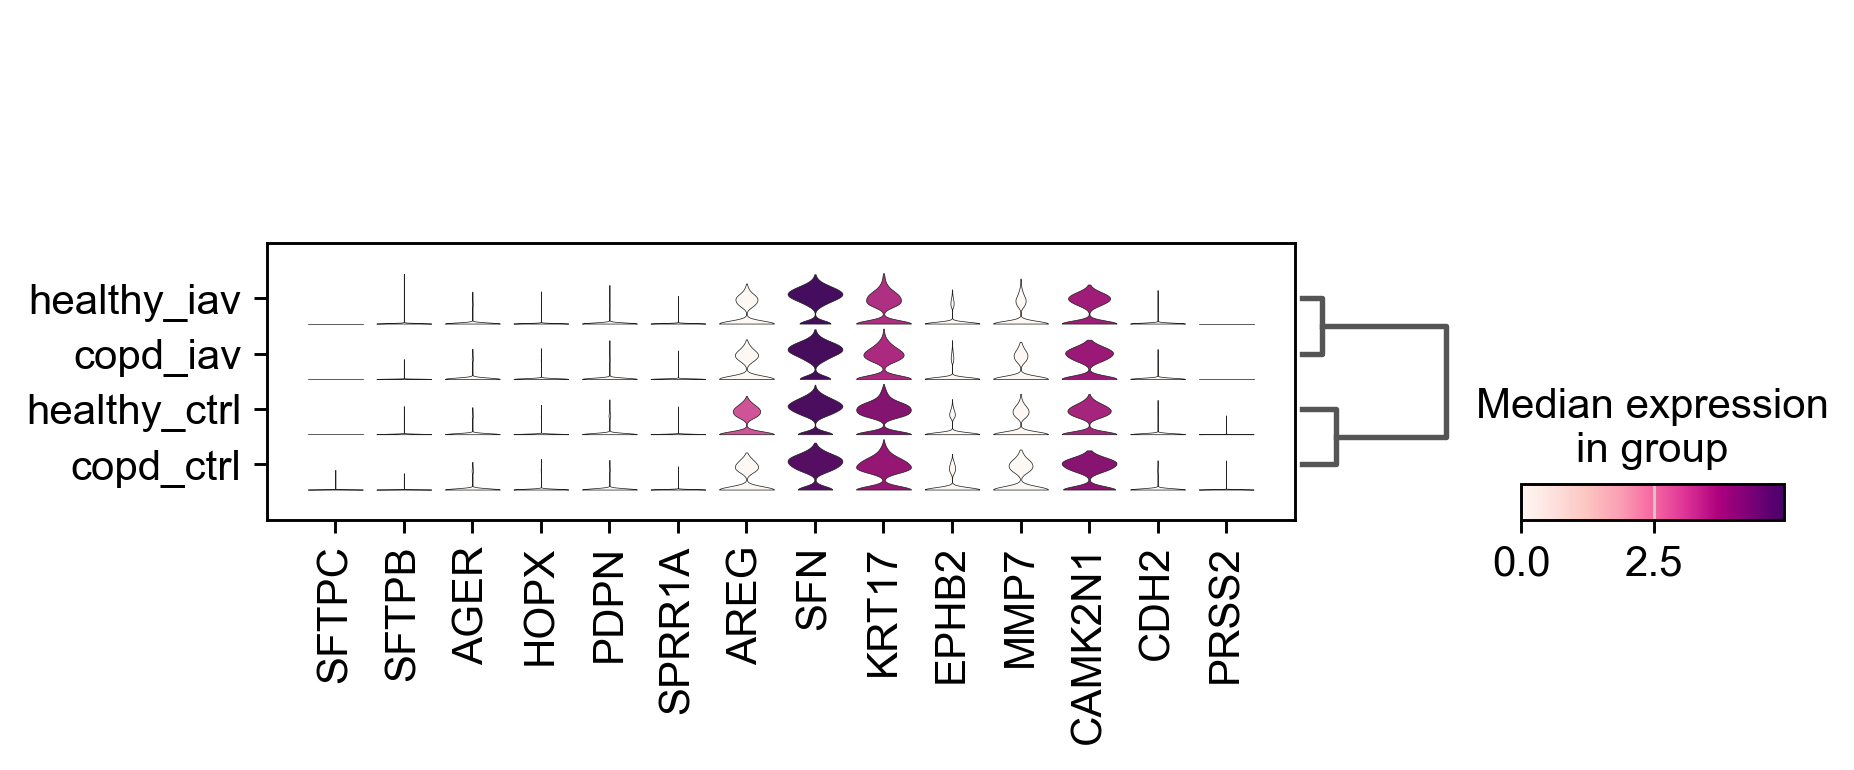

In [19]:
markers = ['SFTPC', 'SFTPB', 'AGER', 'HOPX', 'PDPN', 'SPRR1A', 'AREG', 'SFN', 'KRT17', 'EPHB2', 'MMP7', 'CAMK2N1', 'CDH2', 'PRSS2']
sc.pl.stacked_violin(adata_log, markers, groupby = 'group', dendrogram = True, cmap = 'RdPu')

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


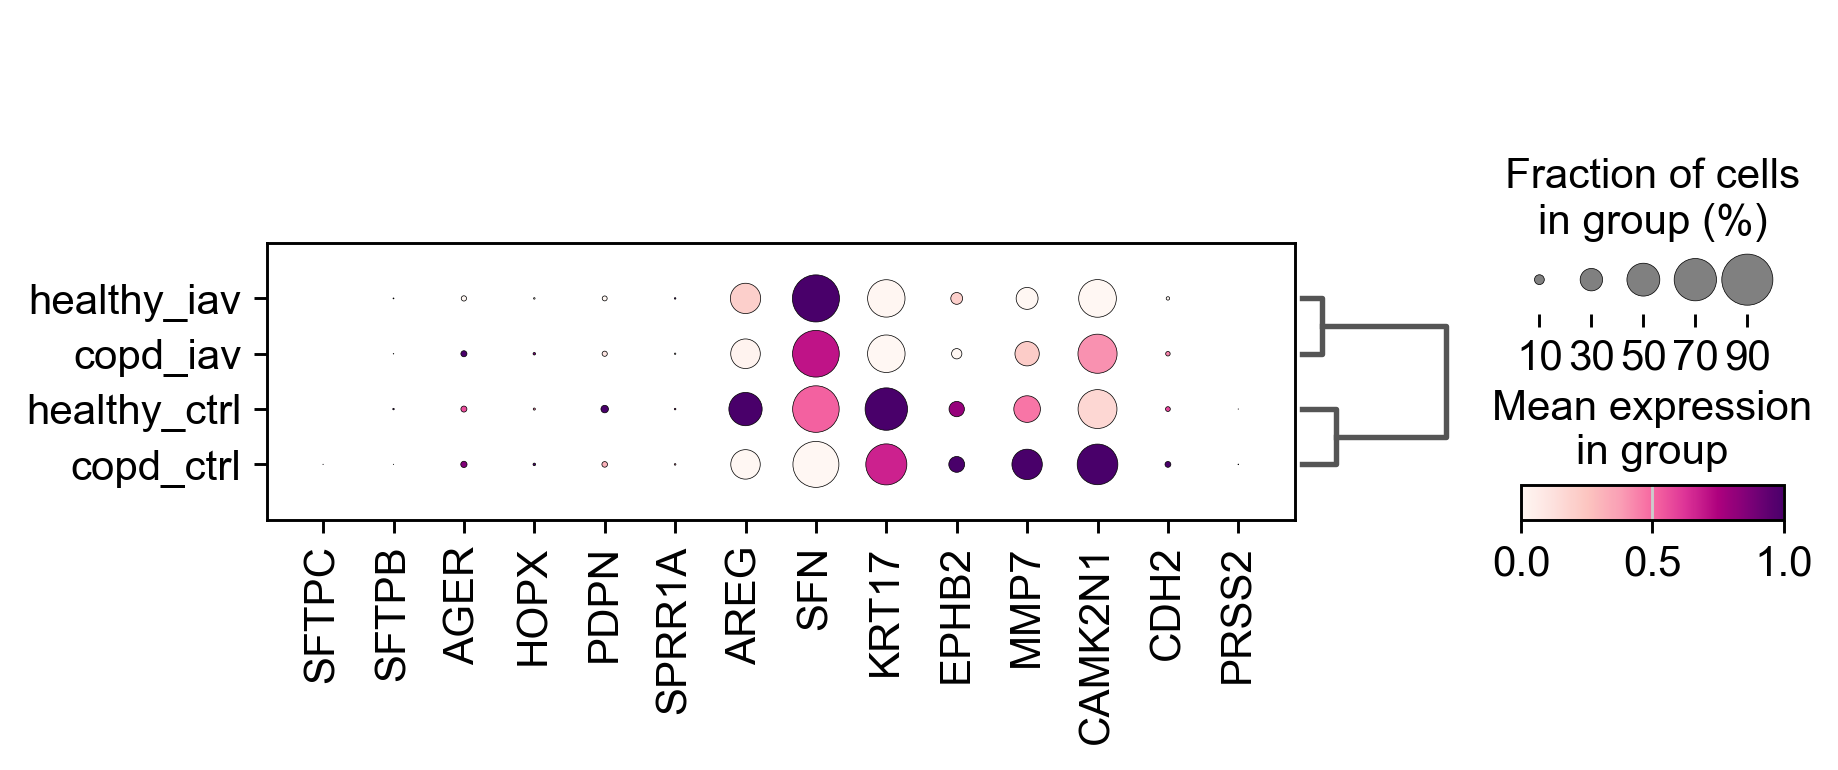

In [20]:
sc.pl.dotplot(adata_log, markers, groupby='group', dendrogram = True, standard_scale='var', cmap = 'RdPu')

### Calculate marker genes 

In [ ]:
sc.tl.rank_genes_groups(adata_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

### Visualise marker genes

In [ ]:
sc.pl.rank_genes_groups(adata_log, ncols = 6)

In [ ]:
markers = ['SERPINE1', 'SERPINE2', 'PMEPA1', 'AMIGO2', 'LGALS1', 'MYL9', 'DKK3', 'MMP2']
sc.pl.stacked_violin(adata_log, markers, groupby = 'group', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'group', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'disease', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'infection', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1', 'FN1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'leiden_states', dendrogram = True, cmap = 'RdPu')

### Compare expression

In [ ]:
sc.pl.rank_genes_groups_violin(adata_log,  n_genes = 5, jitter = False, strip = True)

In [ ]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.show()

In [ ]:
BrEpit_ALL

### Rename cluster based on the cell type annotation

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden', 'cell_type'], size = 1, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
BrEpit_ALL.obs['leiden'].cat.categories

In [ ]:
BrEpit_ALL.obs['leiden_states'] = BrEpit_ALL.obs['leiden']
BrEpit_ALL.obs['leiden_states'].cat.categories = ['Goblet_0', 'Stromal_1', 'Club_2', 'BasalR_3', 'Goblet_4', 'SupraB_5', 'SupraB_6', 'Basal_7', 'Goblet_8', 'Goblet_9', 'Club_10', 'Club_11', 'MultiC_12',
       'MultiC_13', 'Goblet_14', 'Club_15', 'Goblet_16', 'Stromal_17', 'SupraB_18', 'GobletClub_19', 'MultiC_20']
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden', 'cell_type', 'leiden_states'], size = 1, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['cell_type', 'leiden_states'], size = 1, legend_fontsize = 5, ncols = 2)

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [ ]:
BrEpit_ALL_log = BrEpit_ALL.copy()
BrEpit_ALL_log

In [ ]:
sc.pp.normalize_total(BrEpit_ALL_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(BrEpit_ALL_log)

In [ ]:
sc.tl.rank_genes_groups(BrEpit_ALL_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = BrEpit_ALL_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

### Export annotated object

In [ ]:
BrEpit_ALL

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden_states', 'STEAP4', 'CEP55', 'FOXJ1', 'PIGR', 'SERPINE2', 'ADM2', 'WNT10A'], size = 1, legend_fontsize = 5, ncols = 4, legend_loc = 'on data')